In [1]:
# r"G:\2026\OpenhastV7\publish\x64\Release\net8.0\HawtC.dll"
#r "nuget:ScottPlot, 5.0.*"
//# r"C:\Users\123\.nuget\packages\skiasharp\2.88.8\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll"

using OpenWECD.IO.Log;
using MathNet.Numerics.LinearAlgebra;
using OpenWECD.IO.math;
using OpenWECD.IO.Numerics;
using System.Collections.Generic;
using System.Linq;
using System.IO;
using static OpenWECD.IO.math.LinearAlgebraHelper;
using static System.Math;
using OpenWECD.FEML;
using ScottPlot;
using OpenWECD.IO.IO;

Installed Packages ScottPlot, 5.0.47

Loading extensions from `C:\Users\123\.nuget\packages\skiasharp\2.88.9\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

In [2]:
// Setup a custom formatter to display plots as images
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(800, 400)), HtmlFormatter.MimeType);

In [976]:
//# 运行OpenFAST
//Otherhelper.RunPowershell(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\CompareWithFAST\FastModel\openfast_x64.exe G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\CompareWithFAST\FastModel\IEA-15-240-RWT-onshore.fst")

In [977]:
//# 运行HawtC
//Otherhelper.RunPowershell(@"G:\2026\OpenhastV7\build\HawtC.exe G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\Openhast_15MW_PowerProduction_land.hst")

In [66]:
//#尝试读取FAST输出的时间序列
var fastres=OpenWECD.APIL.PostAPI.PstAPI.API_GetFASTFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\CompareWithFAST\FastModel\\IEA-15-240-RWT-onshore.out");
Otherhelper.Tostring(fastres.Keys.ToArray())

Time
Wind1VelX
Wind1VelY
Wind1VelZ
Azimuth
BldPitch1
BldPitch2
BldPitch3
GenSpeed
IPDefl1
LSSGagMya
LSSGagMza
LSSTipMys
LSSTipMzs
LSShftFys
LSShftFzs
NacYaw
NcIMUTAxs
NcIMUTAys
NcIMUTAzs
OoPDefl1
PtfmHeave
PtfmPitch
PtfmRoll
PtfmSurge
PtfmSway
PtfmYaw
RootFxb1
RootFxb2
RootFxb3
RootFxc1
RootFxc2
RootFxc3
RootFyb1
RootFyb2
RootFyb3
RootFyc1
RootFyc2
RootFyc3
RootFzb1
RootFzb2
RootFzb3
RootFzc1
RootFzc2
RootFzc3
RootMxb1
RootMxb2
RootMxb3
RootMxc1
RootMxc2
RootMxc3
RootMyb1
RootMyb2
RootMyb3
RootMyc1
RootMyc2
RootMyc3
RootMzb1
RootMzb2
RootMzb3
RootMzc1
RootMzc2
RootMzc3
RotSpeed
RotThrust
RotTorq
TTDspTwst
TipDxb1
TipDxb2
TipDxb3
TipDxc1
TipDxc2
TipDxc3
TipDyb1
TipDyb2
TipDyb3
TipDyc1
TipDyc2
TipDyc3
TipDzb1
TipDzb2
TipDzb3
TipDzc1
TipDzc2
TipDzc3
TwHt1TPxi
TwHt1TPyi
TwrTpTDxi
TwrTpTDyi
TwrTpTDzi
TwrBsFxt
TwrBsFyt
TwrBsFzt
TwrBsMxt
TwrBsMyt
TwrBsMzt
TwstDefl1
YawBrFxp
YawBrFyp
YawBrFzp
YawBrMxp
YawBrMyp
YawBrMzp
YawBrTDxt
YawBrTDyt
Q_B1E1
Q_B2E1
Q_B3E1
Q_B1F1
Q_B2F1
Q_B3F1
Q_B1F2
Q_B2F2

### 1 对比叶片位移

#### 1.1 读取数据

In [158]:
//#获取HawtC的输出
var hawcres1=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\MBD_Blade Motiontip  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.MBD.out");
hawcres1.Keys

[ Time, OoPDefl B_0, OoPDefl B_1, OoPDefl B_2, IPDefl B_0, IPDefl B_1, IPDefl B_2, TipDzb B_0, TipDzb B_1, TipDzb B_2, TipDxb B_0, TipDxb B_1, TipDxb B_2, TipDyb B_0, TipDyb B_1, TipDyb B_2, Tip2Twr B_0, Tip2Twr B_1, Tip2Twr B_2, TipDxyc B_0 ... (5 more) ]

#### 1.1 对比叶片的挥舞位移


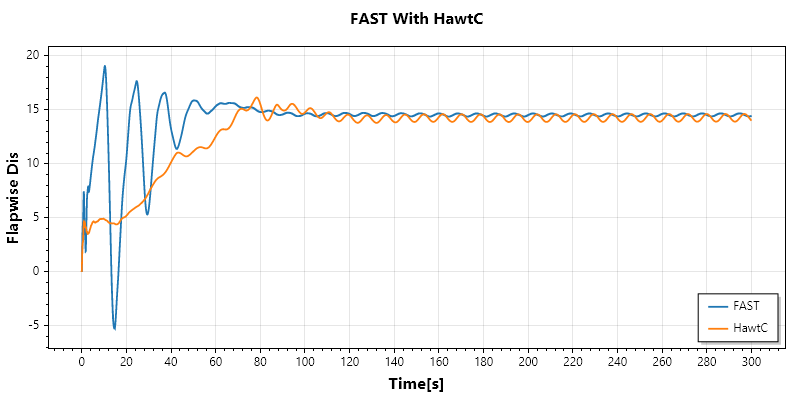

In [159]:
ScottPlot.Plot plt = new();
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["OoPDefl1"][0,-1].ToArray());
sig1.LineWidth=1.8f;
sig1.MarkerSize=0.0f;
sig1.LegendText="FAST";
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres1["OoPDefl   B_0"][0,-1].ToArray());
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
sig2.LegendText="HawtC";
plt.XLabel("Time[s]");
plt.YLabel("Flapwise Dis");
plt.Title("FAST With HawtC");
plt

#### 1.2 对比叶片的摆振位移


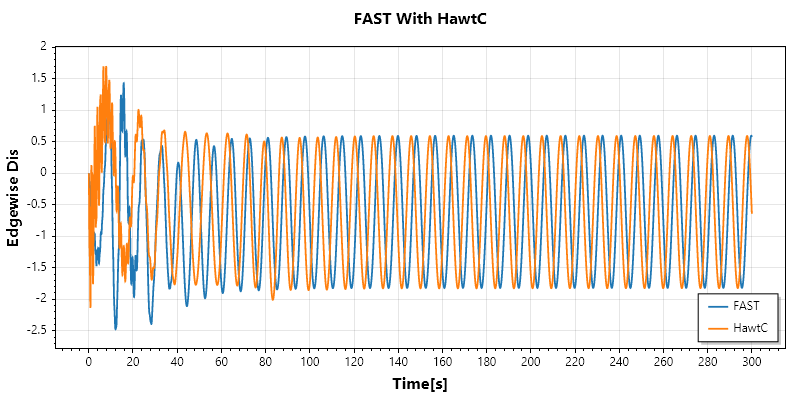

In [160]:
ScottPlot.Plot plt = new();
sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["IPDefl1"][0,-1].ToArray());
sig1.LegendText="FAST";
sig1.LineWidth=1.8f;
sig1.MarkerSize=0.0f;
sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres1["IPDefl    B_1"][0,-1].ToArray());
sig2.LegendText="HawtC";
sig2.LineWidth=1.8f;
sig2.MarkerSize=0.0f;
plt.XLabel("Time[s]");
plt.YLabel("Edgewise Dis");
plt.Title("FAST With HawtC");
plt

### 2 对比塔顶位移

#### 2.1 读取数据

In [161]:
//#获取HawtC的输出
var hawcres2=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\MBD_Tower Top And Yaw Bearing Motions  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.MBD.out");
hawcres2.Keys

[ Time, TTDspFA , TTDspSS , TTDspAx ]

#### 2.2 对比塔顶的挥舞位移


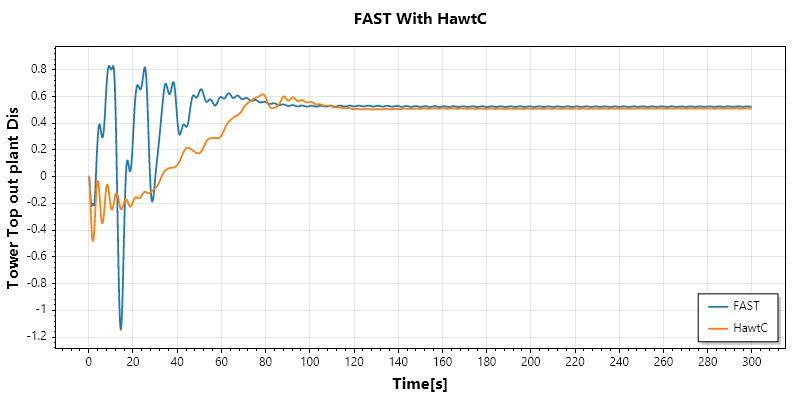

In [162]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrTpTDxi"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres["TTDspFA   "].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrTpTDxi"][0,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres2["TTDspFA   "][0,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Tower Top out plant Dis");
plt.Title("FAST With HawtC");
plt

#### 2.3 对比塔顶的摆振位移


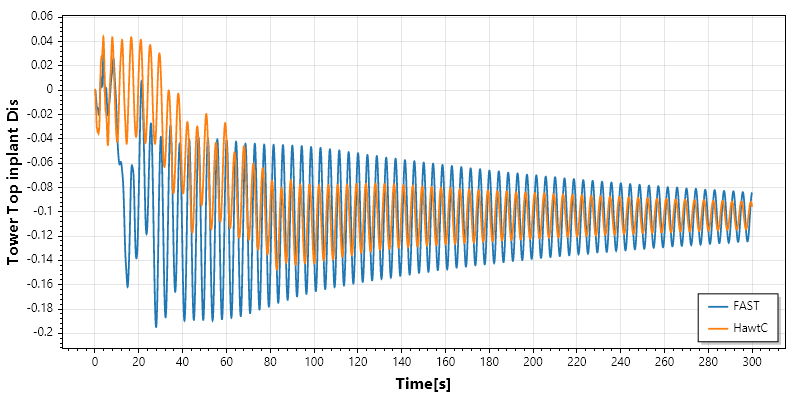

In [163]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrTpTDyi"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres["TTDspSS   "].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrTpTDyi"][0,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres2["TTDspSS   "][0,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Tower Top inplant Dis");
plt

### 3 对比塔底载荷

#### 3.1 获取HawtC数据

In [164]:
//#获取HawtC的输出
var hawcres3=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\MBD_Tower Base Loads  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.MBD.out");
hawcres3.Keys

[ Time, TwrBsFxyt , TwrBsMxyt , TwrBsFxt , TwrBsFyt , TwrBsFzt , TwrBsMxt , TwrBsMyt , TwrBsMzt ]

#### 3.2 获取塔底Mx弯矩


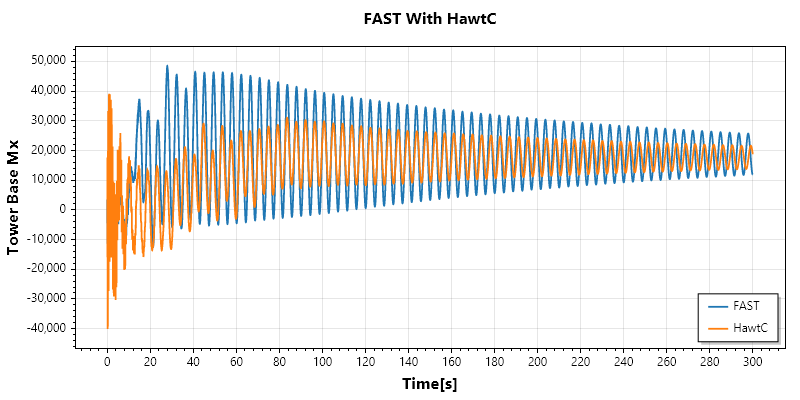

In [116]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsMxt"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsMxt"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsMxt"][0,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsMxt  "][0,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Tower Base Mx");
plt.Title("FAST With HawtC");
plt

#### 3.3 获取塔底My弯矩


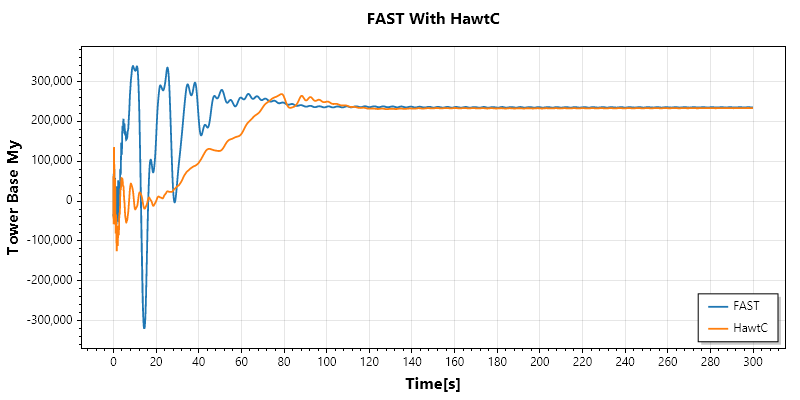

In [165]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsMyt"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsMyt"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsMyt"][0,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsMyt  "][0,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Tower Base My");
plt.Title("FAST With HawtC");
plt

#### 3.4 获取塔底Mz弯矩


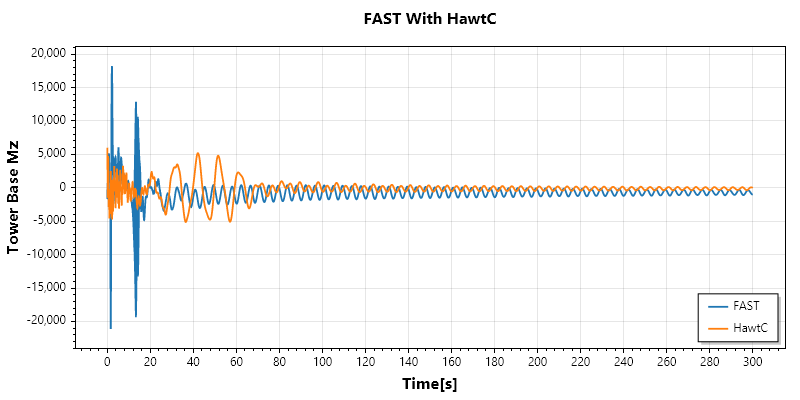

In [166]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsMzt"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsMzt"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsMzt"][0,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsMzt  "][0,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Tower Base Mz");
plt.Title("FAST With HawtC");
plt

#### 3.5 获取塔底Fx力


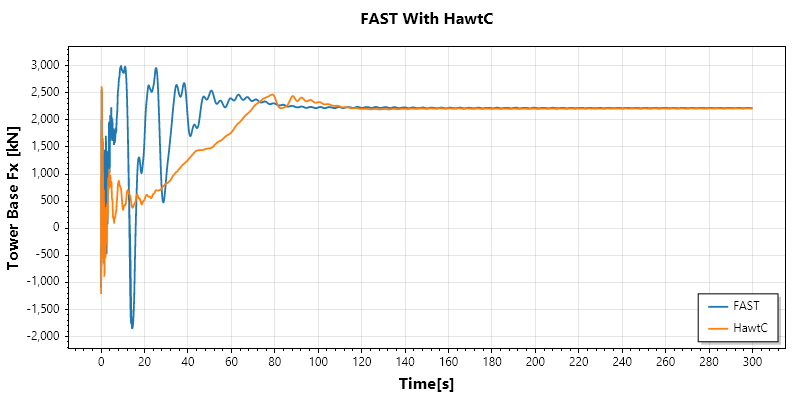

In [167]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsFxt"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsFxt"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsFxt"][0,-1].ToArray());
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
sig1.LegendText="FAST";
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsFxt  "][0,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Tower Base Fx [kN]");
plt.Title("FAST With HawtC");
plt

#### 3.6 获取塔底Fy力


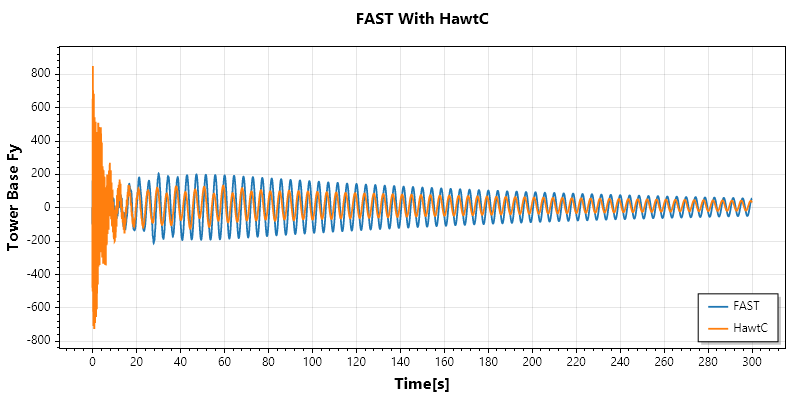

In [168]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsFyt"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsFyt"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsFyt"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsFyt  "].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Tower Base Fy");
plt.Title("FAST With HawtC");
plt

#### 3.7 获取塔底Fz力


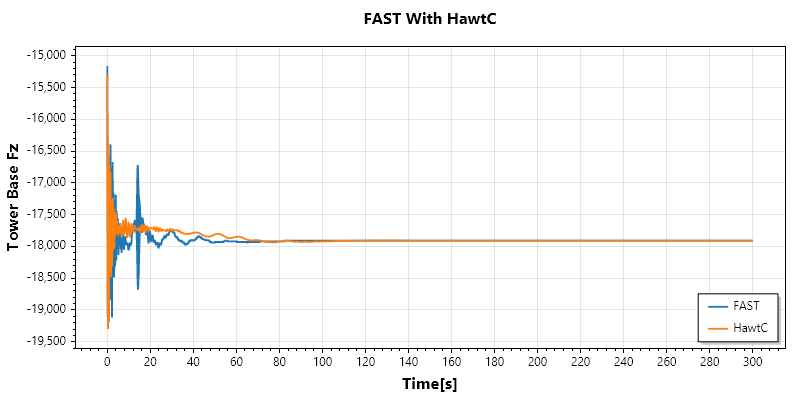

In [169]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsFzt"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsFzt"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["TwrBsFzt"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres3["TwrBsFzt  "].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Tower Base Fz");
plt.Title("FAST With HawtC");
plt

### 4对比叶根载荷

#### 4.1 获取HawtC数据

In [125]:
//#获取HawtC的输出
var hawcres4=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\MBD_Blade Root Loads  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.MBD.out");
hawcres4.Keys

[ Time, RootFxyc B_0, RootFxyc B_1, RootFxyc B_2, RootFxyb B_0, RootFxyb B_1, RootFxyb B_2, RootMxyc B_0, RootMxyc B_1, RootMxyc B_2, RootMxyb B_0, RootMxyb B_1, RootMxyb B_2, RootFxc B_0, RootFxc B_1, RootFxc B_2, RootFyc B_0, RootFyc B_1, RootFyc B_2, RootFzc B_0 ... (29 more) ]

#### 4.2 获取叶根Mx弯矩


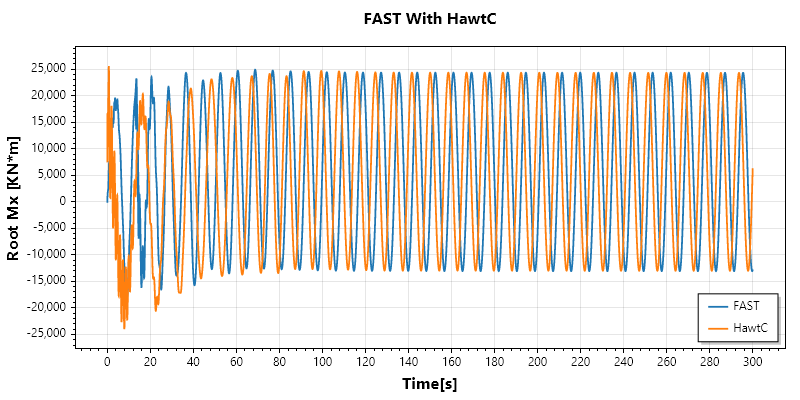

In [130]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMxb1"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMxb   B_1"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Root Mx [KN*m]");
plt.Title("FAST With HawtC");
plt

#### 4.3 获取叶根My弯矩


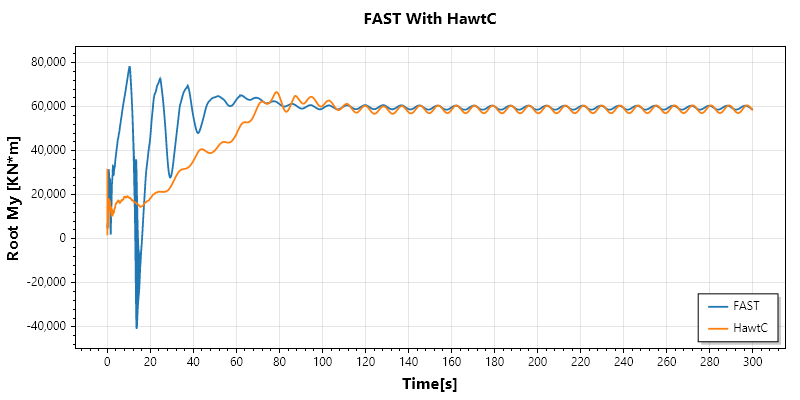

In [127]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMy1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMy1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMyb1"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMyb   B_0"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Root My [KN*m]");
plt.Title("FAST With HawtC");
plt

#### 4.4 获取叶根Mz弯矩


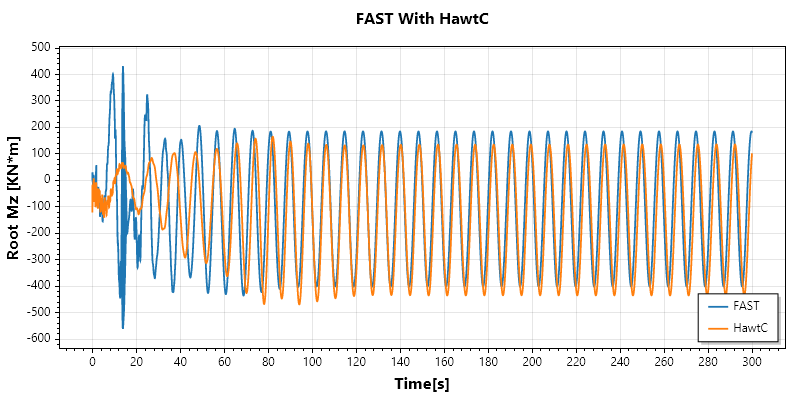

In [128]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMz1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMz1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMzb1"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMzb   B_0"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Root Mz [KN*m]");
plt.Title("FAST With HawtC");
plt

#### 4.5 获取叶根Fx 力


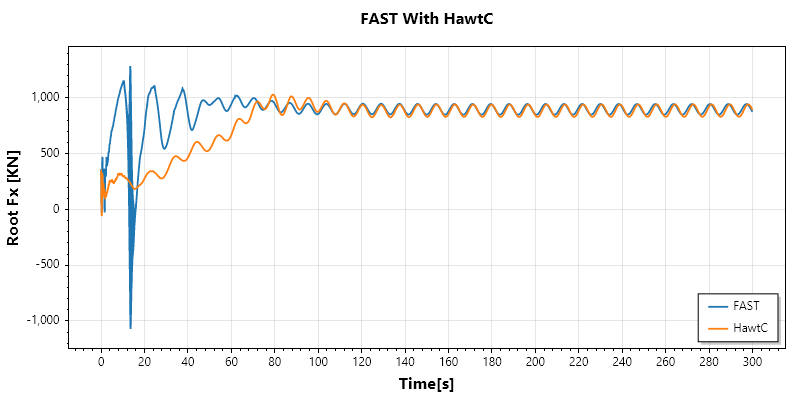

In [131]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootFx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootFx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootFxb1"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootFxb   B_0"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Root Fx [KN]");
plt.Title("FAST With HawtC");
plt

#### 4.6 获取叶根Fy 力


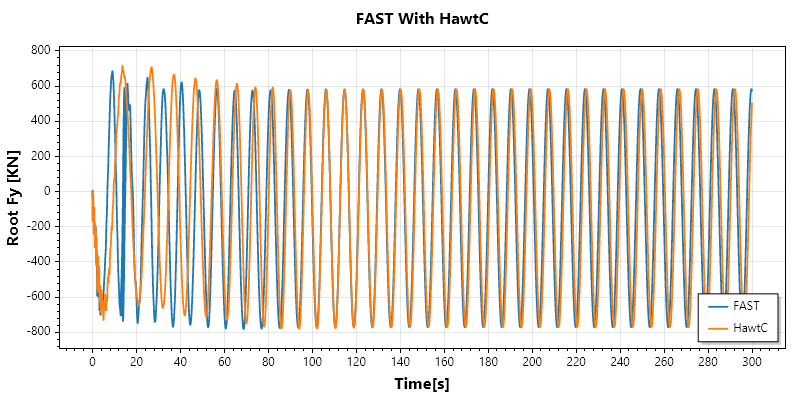

In [132]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootFx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootFx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootFyb1"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootFyb   B_0"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Root Fy [KN]");
plt.Title("FAST With HawtC");
plt



#### 4.7 获取叶根Fz 力


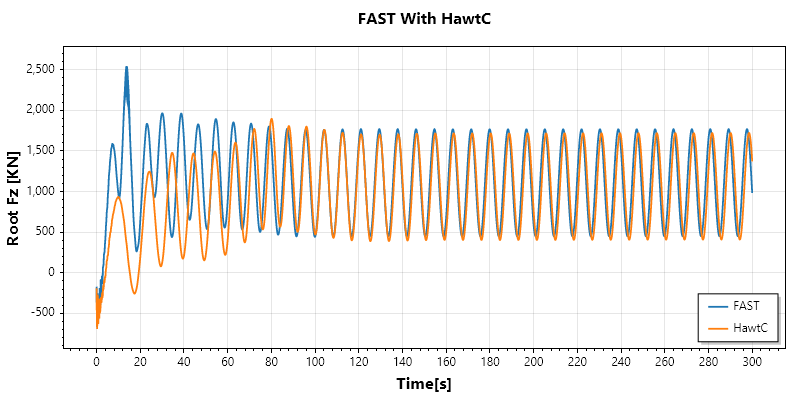

In [133]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootFx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootFx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootFzb1"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootFzb   B_0"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Root Fz [KN]");
plt.Title("FAST With HawtC");
plt

### 5 对比叶片节点的气动载荷

#### 5.1 读取HawtC的数据

In [134]:
//#获取HawtC的输出
var hawcres5=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\AER_Blade Aero Load  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.AER.out");
hawcres5.Keys

[ Time, BkNjFl B_0_N_0, BkNjFl B_0_N_1, BkNjFl B_0_N_15, BkNjFl B_0_N_20, BkNjFl B_0_N_24, BkNjFl B_0_N_31, BkNjFl B_0_N_34, BkNjFl B_0_N_39, BkNjFl B_0_N_44, BkNjFd B_0_N_0, BkNjFd B_0_N_1, BkNjFd B_0_N_15, BkNjFd B_0_N_20, BkNjFd B_0_N_24, BkNjFd B_0_N_31, BkNjFd B_0_N_34, BkNjFd B_0_N_39, BkNjFd B_0_N_44, BkNjMm B_0_N_0 ... (8 more) ]

#### 5.2 读取节点的气动升力 Fl

0.5710196467066706


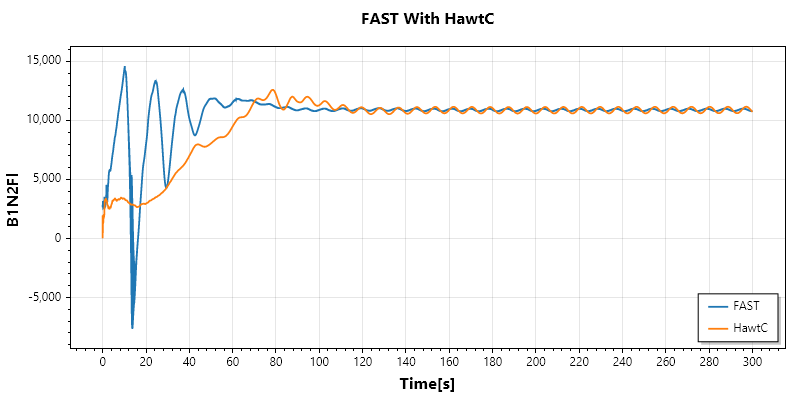

In [135]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N8Fl"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres5["BkNjFl    B_0_N_39"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("B1N2Fl ");
plt.Title("FAST With HawtC");
Console.Write((fastres["B1N8Fl"][10000,-1].Max()-hawcres5["BkNjFl    B_0_N_39"][10000,-1].Max())/hawcres5["BkNjFl    B_0_N_39"][10000,-1].Max()*100);
plt



#### 5.3 读取节点的气动阻力 Fd

0.0013524867190464465


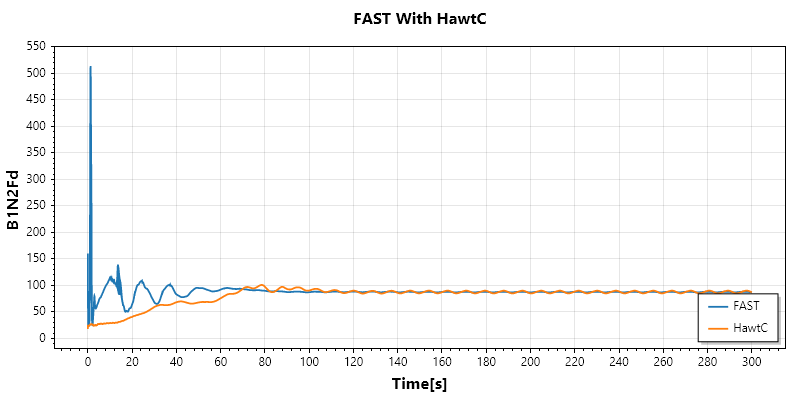

In [136]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N8Fd"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres5["BkNjFd    B_0_N_39"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("B1N2Fd ");
plt.Title("FAST With HawtC");
Console.Write((fastres["B1N8Fd"][10000,-1].Max()-hawcres5["BkNjFd    B_0_N_39"][10000,-1].Max())/hawcres5["BkNjFd    B_0_N_39"][10000,-1].Max()*100);
plt

#### 5.4 读取节点的气动弯矩 Mm


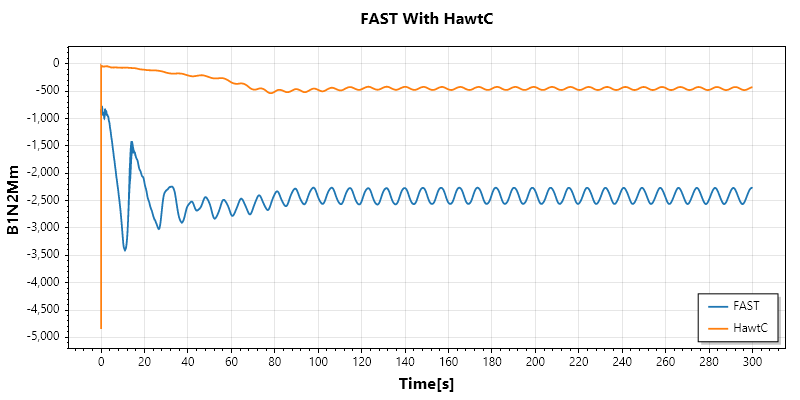

In [137]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3Mm"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres5["BkNjMm    B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("B1N2Mm ");
plt.Title("FAST With HawtC");
plt

### 6 对比气动信息

#### 6.1 读取HawtC信息

In [138]:
//#获取HawtC的输出
var hawcres6=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\AER_Blade Airfoil Inf  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.AER.out");
Otherhelper.Tostring(hawcres6.Keys.ToArray()) 

Time
BkNjPhi   B_0_N_0
BkNjPhi   B_0_N_1
BkNjPhi   B_0_N_15
BkNjPhi   B_0_N_20
BkNjPhi   B_0_N_24
BkNjPhi   B_0_N_31
BkNjPhi   B_0_N_34
BkNjPhi   B_0_N_39
BkNjPhi   B_0_N_44
BkNjVRel  B_0_N_0
BkNjVRel  B_0_N_1
BkNjVRel  B_0_N_15
BkNjVRel  B_0_N_20
BkNjVRel  B_0_N_24
BkNjVRel  B_0_N_31
BkNjVRel  B_0_N_34
BkNjVRel  B_0_N_39
BkNjVRel  B_0_N_44
BkNjTheta B_0_N_0
BkNjTheta B_0_N_1
BkNjTheta B_0_N_15
BkNjTheta B_0_N_20
BkNjTheta B_0_N_24
BkNjTheta B_0_N_31
BkNjTheta B_0_N_34
BkNjTheta B_0_N_39
BkNjTheta B_0_N_44
BkNjAxInd B_0_N_0
BkNjAxInd B_0_N_1
BkNjAxInd B_0_N_15
BkNjAxInd B_0_N_20
BkNjAxInd B_0_N_24
BkNjAxInd B_0_N_31
BkNjAxInd B_0_N_34
BkNjAxInd B_0_N_39
BkNjAxInd B_0_N_44
BkNjTnInd B_0_N_0
BkNjTnInd B_0_N_1
BkNjTnInd B_0_N_15
BkNjTnInd B_0_N_20
BkNjTnInd B_0_N_24
BkNjTnInd B_0_N_31
BkNjTnInd B_0_N_34
BkNjTnInd B_0_N_39
BkNjTnInd B_0_N_44


#### 6.2 读取入流角

-3.938376637273481


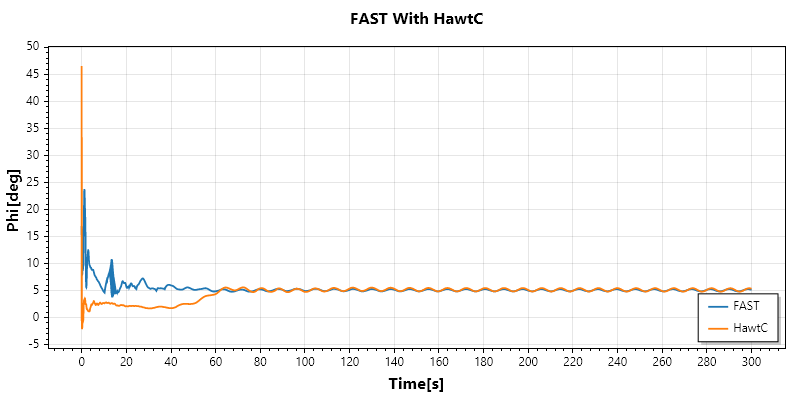

In [139]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N8Phi"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres6["BkNjPhi   B_0_N_39"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Phi[deg] ");
plt.Title("FAST With HawtC");
Console.Write((fastres["B1N8Phi"][10000,-1].Max()-hawcres6["BkNjPhi   B_0_N_39"][10000,-1].Max())/hawcres6["BkNjPhi   B_0_N_39"][10000,-1].Max()*100);
plt

#### 6.2 读取theta角


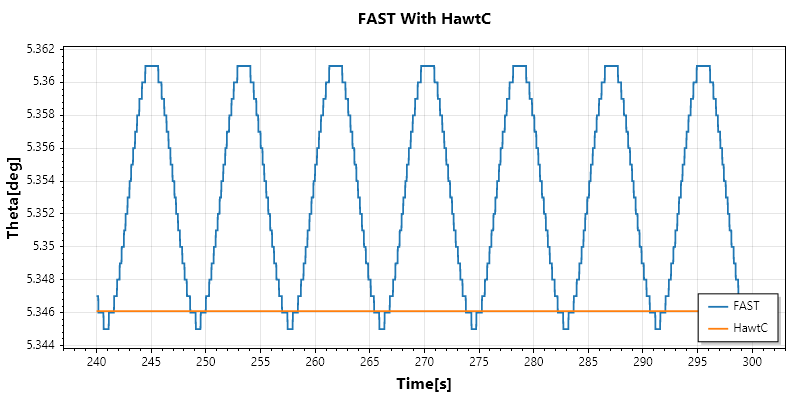

In [140]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][8000,-1].ToArray(), fastres["B1N3Theta"][8000,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][8000,-1].ToArray(), hawcres6["BkNjTheta B_0_N_15"][8000,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Theta[deg]");
plt.Title("FAST With HawtC");
plt

#### 6.3 读取Vrel


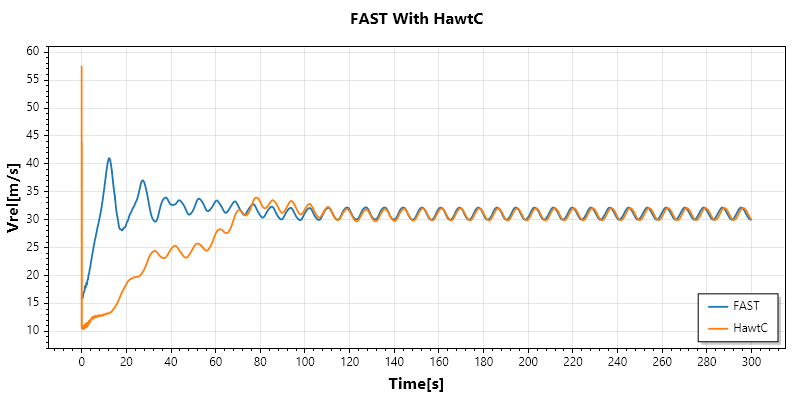

In [141]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3VRel"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres6["BkNjVRel  B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Vrel[m/s]");
plt.Title("FAST With HawtC");
plt

#### 6.4 读取轴向诱导因子Aind


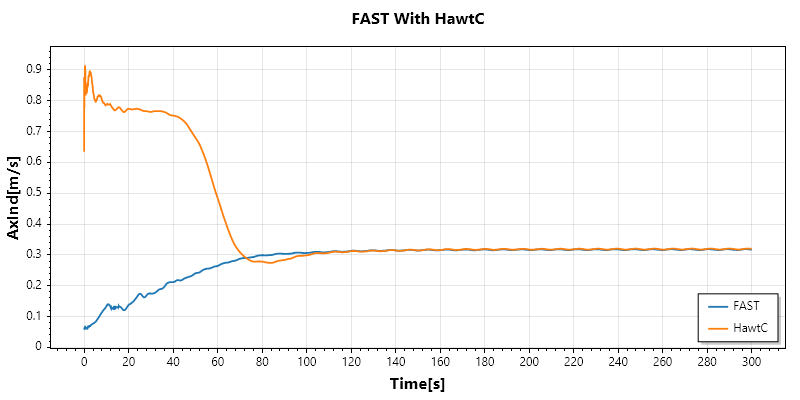

In [142]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3AxInd"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres6["BkNjAxInd B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("AxInd[m/s]");
plt.Title("FAST With HawtC");
plt

In [1008]:
fastres["B1N5AxInd"][0]

0.05432

#### 6.5 读取切向诱导因子Tnind


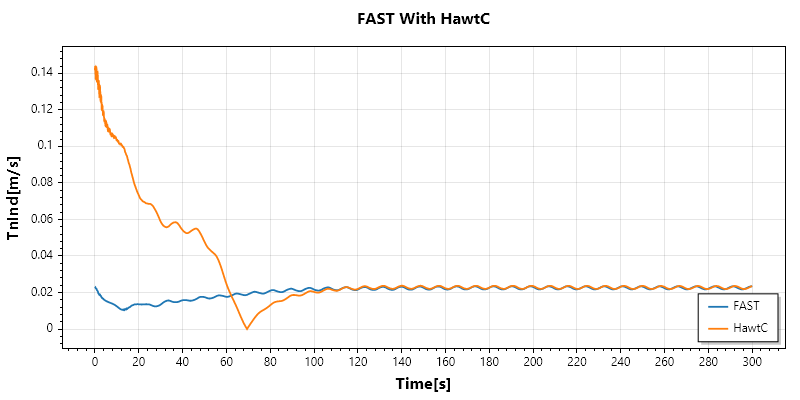

In [143]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3TnInd"][1,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres6["BkNjTnInd B_0_N_15"][1,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("TnInd[m/s]");
plt.Title("FAST With HawtC");
plt

### 7对比入流风速

#### 7.1 读取HawtC文件

In [144]:
//#获取HawtC的输出
var hawcres7=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\AER_Blade Aero Inf  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.AER.out");
Otherhelper.Tostring(hawcres7.Keys.ToArray<string>())

Time
BkNjVUndx B_0_N_0
BkNjVUndx B_0_N_1
BkNjVUndx B_0_N_15
BkNjVUndx B_0_N_20
BkNjVUndx B_0_N_24
BkNjVUndx B_0_N_31
BkNjVUndx B_0_N_34
BkNjVUndx B_0_N_39
BkNjVUndx B_0_N_44
BkNjVUndy B_0_N_0
BkNjVUndy B_0_N_1
BkNjVUndy B_0_N_15
BkNjVUndy B_0_N_20
BkNjVUndy B_0_N_24
BkNjVUndy B_0_N_31
BkNjVUndy B_0_N_34
BkNjVUndy B_0_N_39
BkNjVUndy B_0_N_44
BkNjVUndz B_0_N_0
BkNjVUndz B_0_N_1
BkNjVUndz B_0_N_15
BkNjVUndz B_0_N_20
BkNjVUndz B_0_N_24
BkNjVUndz B_0_N_31
BkNjVUndz B_0_N_34
BkNjVUndz B_0_N_39
BkNjVUndz B_0_N_44
BkNjVDisx B_0_N_0
BkNjVDisx B_0_N_1
BkNjVDisx B_0_N_15
BkNjVDisx B_0_N_20
BkNjVDisx B_0_N_24
BkNjVDisx B_0_N_31
BkNjVDisx B_0_N_34
BkNjVDisx B_0_N_39
BkNjVDisx B_0_N_44
BkNjVDisy B_0_N_0
BkNjVDisy B_0_N_1
BkNjVDisy B_0_N_15
BkNjVDisy B_0_N_20
BkNjVDisy B_0_N_24
BkNjVDisy B_0_N_31
BkNjVDisy B_0_N_34
BkNjVDisy B_0_N_39
BkNjVDisy B_0_N_44
BkNjVDisz B_0_N_0
BkNjVDisz B_0_N_1
BkNjVDisz B_0_N_15
BkNjVDisz B_0_N_20
BkNjVDisz B_0_N_24
BkNjVDisz B_0_N_31
BkNjVDisz B_0_N_34
BkNjVDisz B_0_N_39


#### 7.2 Undx


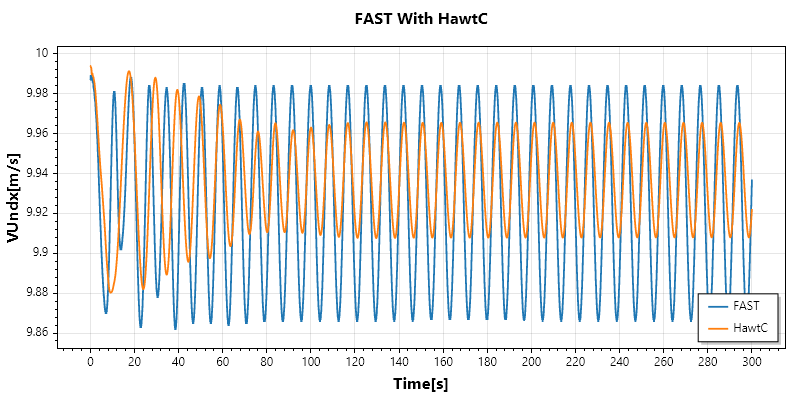

In [145]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N1VUndx"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjVUndx B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("VUndx[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.3 Undy


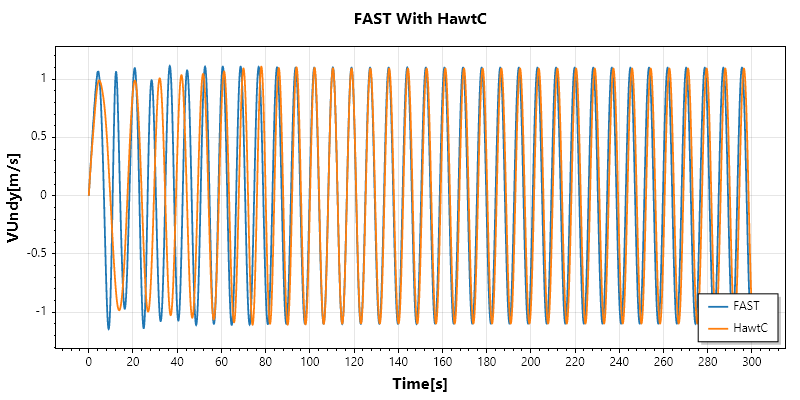

In [146]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3VUndy"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjVUndy B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("VUndy[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.4 Undz


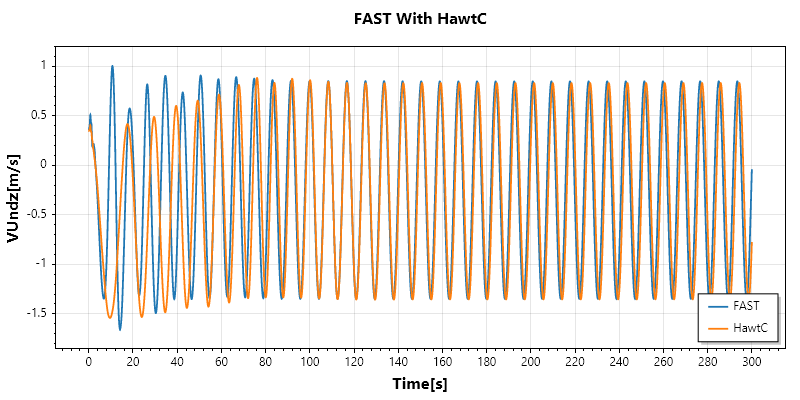

In [147]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3VUndz"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjVUndz B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("VUndz[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.4 UndzALL


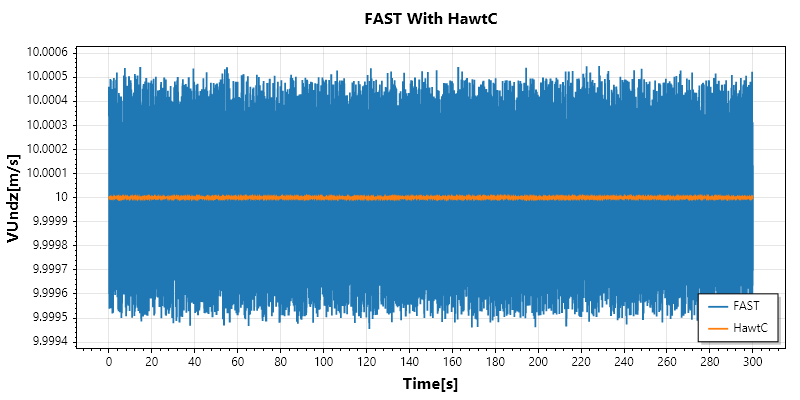

In [148]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var fastdata=(fastres["B1N3VUndx"].PointwisePower(2)+fastres["B1N3VUndy"].PointwisePower(2)+fastres["B1N3VUndz"].PointwisePower(2)).PointwiseSqrt();
var Hawtdata=(hawcres7["BkNjVUndx B_0_N_15"].PointwisePower(2)+
            hawcres7["BkNjVUndy B_0_N_15"].PointwisePower(2)+
            hawcres7["BkNjVUndz B_0_N_15"].PointwisePower(2)).PointwiseSqrt();
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastdata.ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), Hawtdata.ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("VUndz[m/s]");
plt.Title("FAST With HawtC");
plt


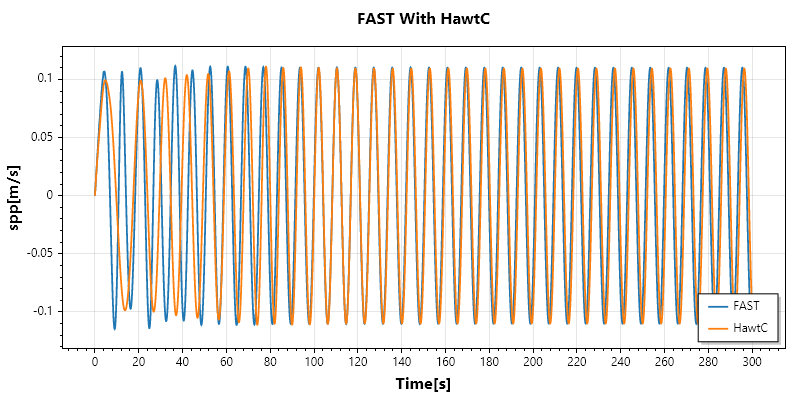

In [149]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var fastdata= (fastres["B1N3VUndy"].PointwiseDivide(fastres["B1N3VUndx"])).PointwiseAtan();
var Hawtdata=(hawcres7["BkNjVUndy B_0_N_15"].PointwiseDivide(hawcres7["BkNjVUndx B_0_N_15"])).PointwiseAtan();//(hawcres7["BkNjVUndx B_0_N_15"].PointwisePower(2)+
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastdata.ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), Hawtdata.ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("spp[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.5 DisX


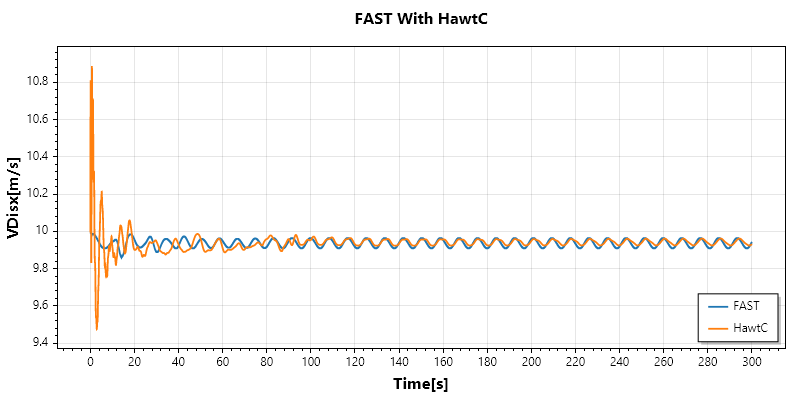

In [150]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3VDisx"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjVDisx B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("VDisx[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.6 DisY


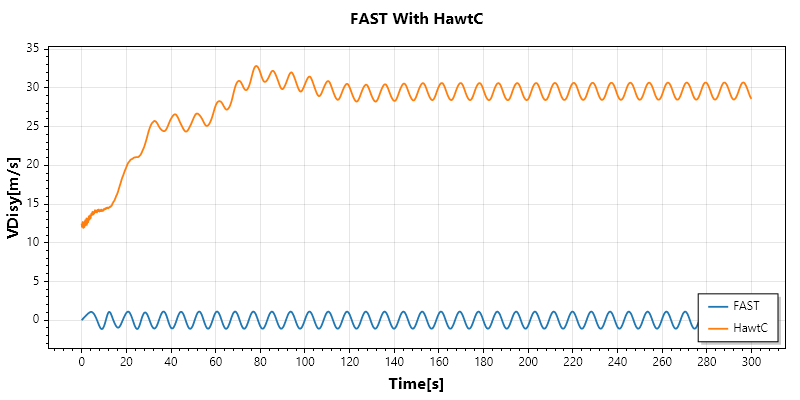

In [151]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3VDisy"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjVDisy B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("VDisy[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.7 DisZ


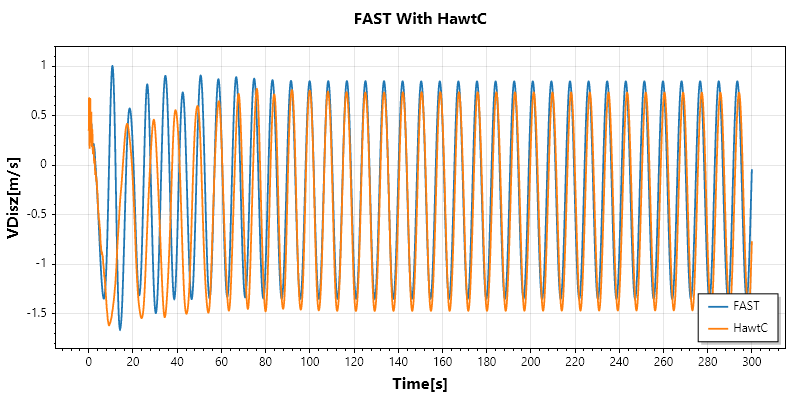

In [152]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3VDisz"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjVDisz B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("VDisz[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.8 StvX


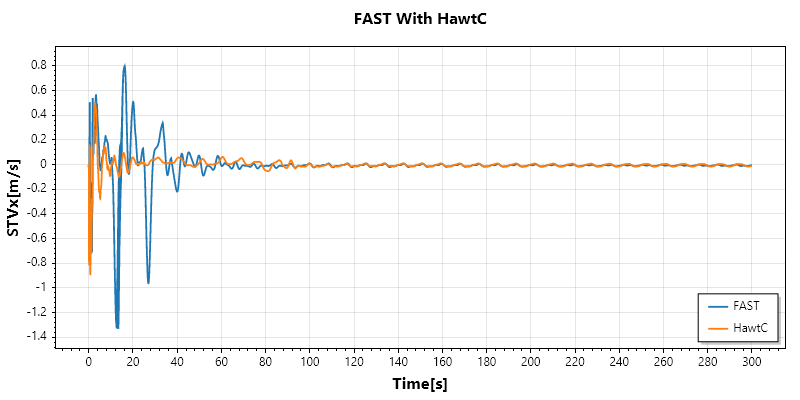

In [153]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3STVx"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjSTVx  B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("STVx[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.9 StvY


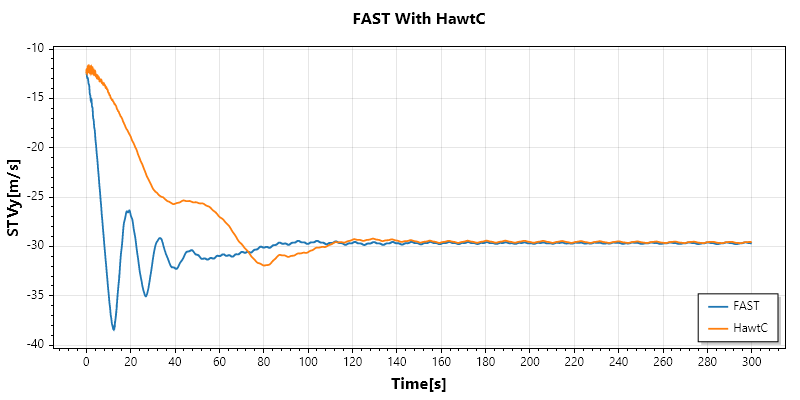

In [154]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3STVy"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjSTVy  B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("STVy[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.10 StvZ


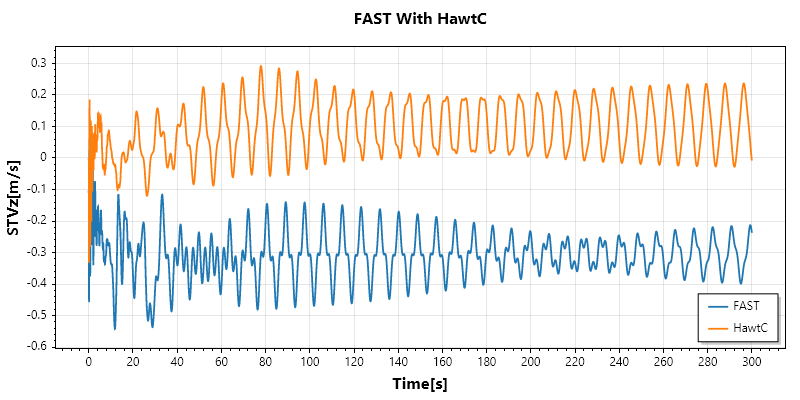

In [155]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1N3STVz"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BkNjSTVz  B_0_N_15"].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("STVz[m/s]");
plt.Title("FAST With HawtC");
plt

#### 7.11 Bpitch


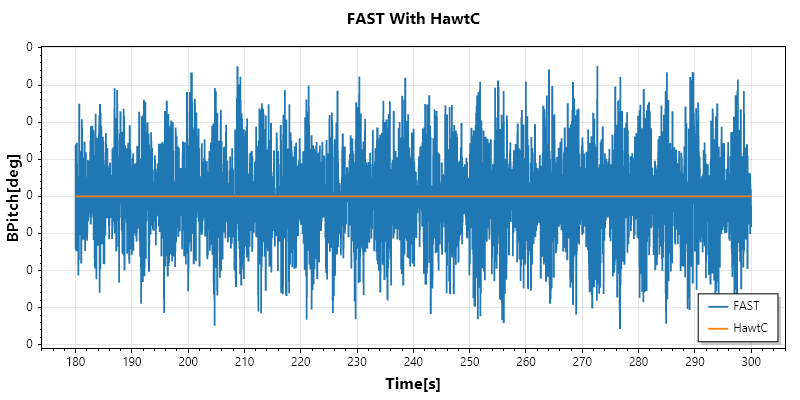

In [156]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][6000,-1].ToArray(), fastres["B1Pitch"][6000,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][6000,-1].ToArray(), hawcres7["BPitch    B_0"][6000,-1].ToArray());
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("BPitch[deg]");
plt.Title("FAST With HawtC");
plt

#### 7.12 BAzimuth


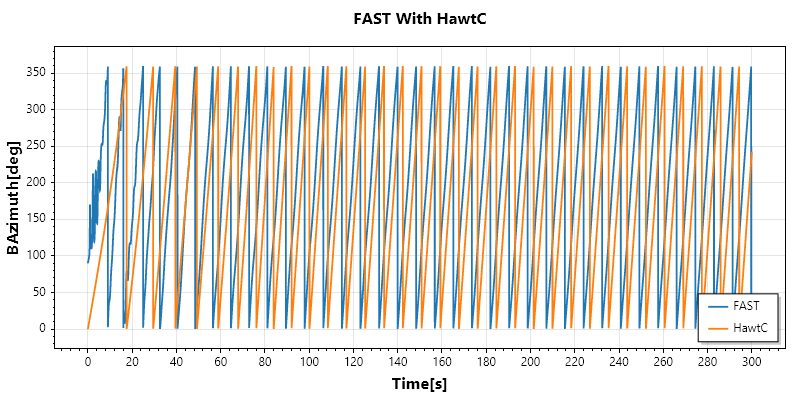

In [157]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["B1Azimuth"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres7["BAzimuth  B_0"].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("BAzimuth[deg]");
plt.Title("FAST With HawtC");
plt

In [48]:
2.0943951023931953*180/Math.PI

119.99999999999999

### 8 自由度对比

#### 8.1 读取数据

In [49]:
//#获取HawtC的输出
var hawcres8=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\MBD_Freedom  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.MBD.out");
Otherhelper.Tostring(hawcres8.Keys.ToArray<string>())

Time
QD2_B1E1  
QD2_B1F1  
QD2_B1F2  
QD2_B2E1  
QD2_B2F1  
QD2_B2F2  
QD2_B3E1  
QD2_B3F1  
QD2_B3F2  
QD2_DRTR  
QD2_GEAZ  
QD2_HV    
QD2_P     
QD2_R     
QD2_RFRL  
QD2_SG    
QD2_SW    
QD2_TFA1  
QD2_TFA2  
QD2_TFRL  
QD2_TSS1  
QD2_TSS2  
QD2_Y     
QD2_BTMD  B_0
QD2_BTMD  B_1
QD2_BTMD  B_2
QD2_YAW   
QD_B1E1   
QD_B1F1   
QD_B1F2   
QD_B2E1   
QD_B2F1   
QD_B2F2   
QD_B3E1   
QD_B3F1   
QD_B3F2   
QD_DRTR   
QD_GEAZ   
QD_HV     
QD_P      
QD_R      
QD_RFRL   
QD_SG     
QD_SW     
QD_TFA1   
QD_TFA2   
QD_TFRL   
QD_TSS1   
QD_TSS2   
QD_Y      
QD_BTMD   B_0
QD_BTMD   B_1
QD_BTMD   B_2
QD_YAW    
Q_B1E1    
Q_B1F1    
Q_B1F2    
Q_B2E1    
Q_B2F1    
Q_B2F2    
Q_B3E1    
Q_B3F1    
Q_B3F2    
Q_DRTR    
Q_GEAZ    
Q_HV      
Q_P       
Q_R       
Q_RFRL    
Q_SG      
Q_SW      
Q_TFA1    
Q_TFA2    
Q_TFRL    
Q_TSS1    
Q_TSS2    
Q_Y       
Q_YAW     
Q_BTMD    B_0
Q_BTMD    B_1
Q_BTMD    B_2
Q_TTMD    
QD_TTMD   
QD2_TTMD  


#### 8.2 叶片1阶摆振


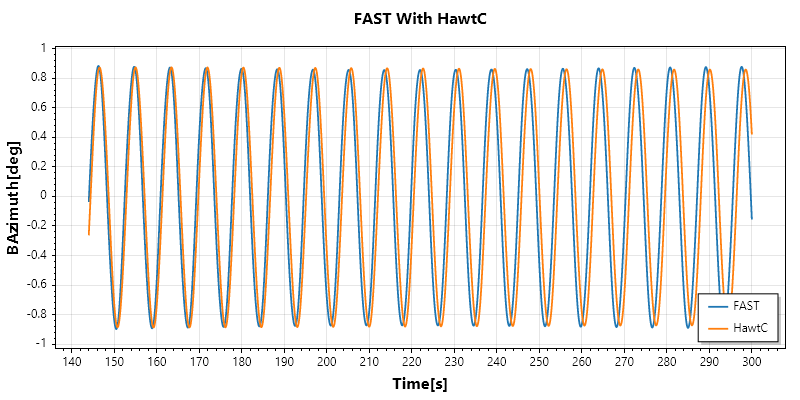

In [50]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), fastres["QD_B1E1"][4800,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), hawcres8["QD_B1E1   "][4800,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("BAzimuth[deg]");
plt.Title("FAST With HawtC");
plt

#### 8.3 叶片1阶挥舞


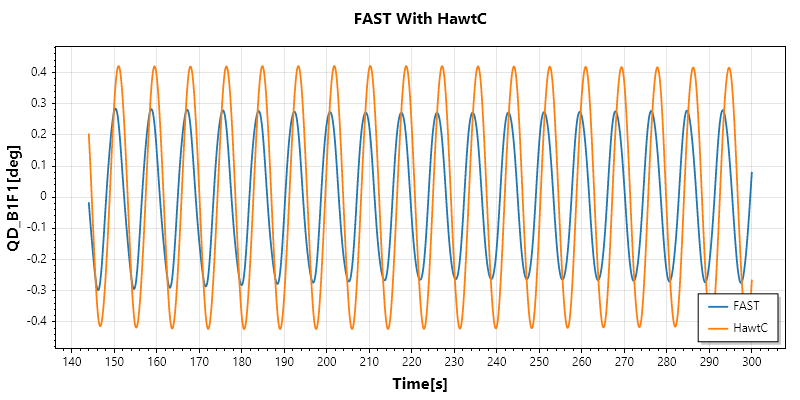

In [51]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), fastres["QD_B1F1"][4800,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), hawcres8["QD_B1F1   "][4800,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("QD_B1F1[deg]");
plt.Title("FAST With HawtC");
plt

#### 8.4 叶片2阶挥舞


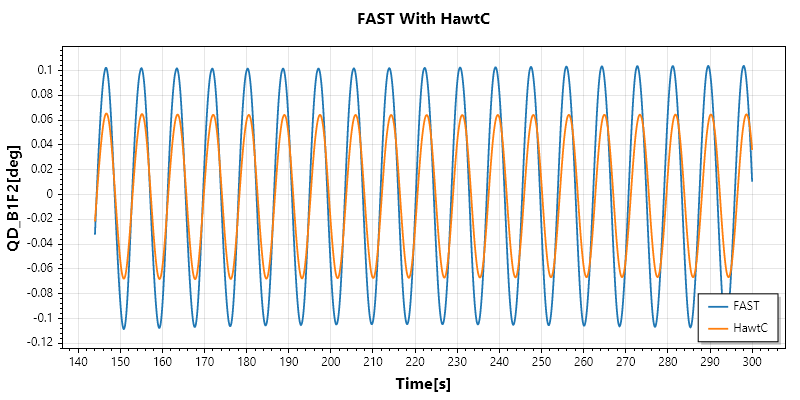

In [52]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), fastres["QD_B1F2"][4800,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), hawcres8["QD_B1F2   "][4800,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("QD_B1F2[deg]");
plt.Title("FAST With HawtC");
plt

#### 8.5 发电机GEAZ


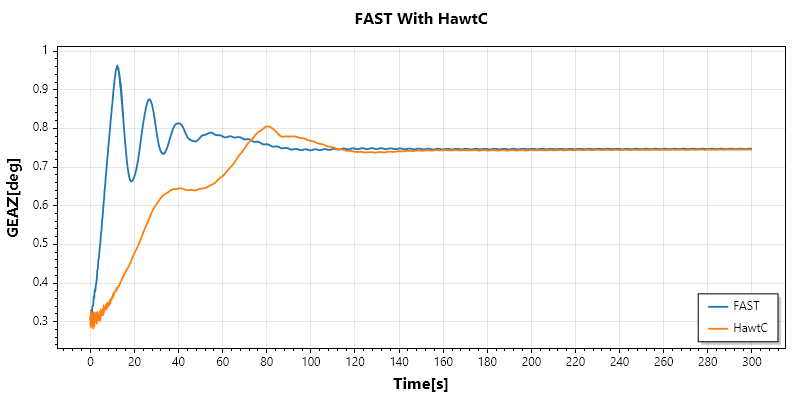

In [53]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["QD_GeAz"][0,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres8["QD_GEAZ   "][0,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("GEAZ[deg]");
plt.Title("FAST With HawtC");
plt



In [55]:
fastres["Q_GeAz"][0]*180.0/3.1415926-180

89.97771767096725


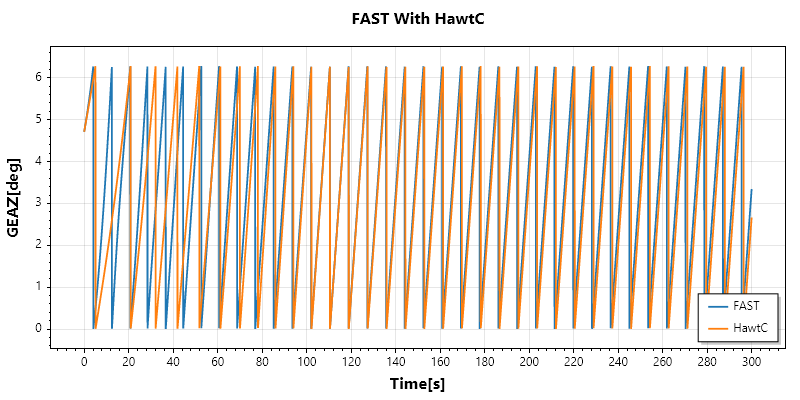

In [57]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["Q_GeAz"].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres8["Q_GEAZ    "].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("GEAZ[deg]");
plt.Title("FAST With HawtC");
plt

#### 8.6 塔架的一阶挥舞


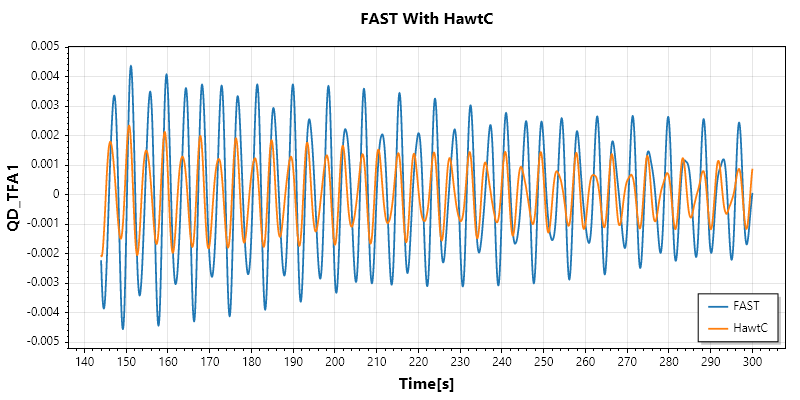

In [58]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), fastres["QD_TFA1"][4800,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), hawcres8["QD_TFA1   "][4800,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("QD_TFA1");
plt.Title("FAST With HawtC");
plt


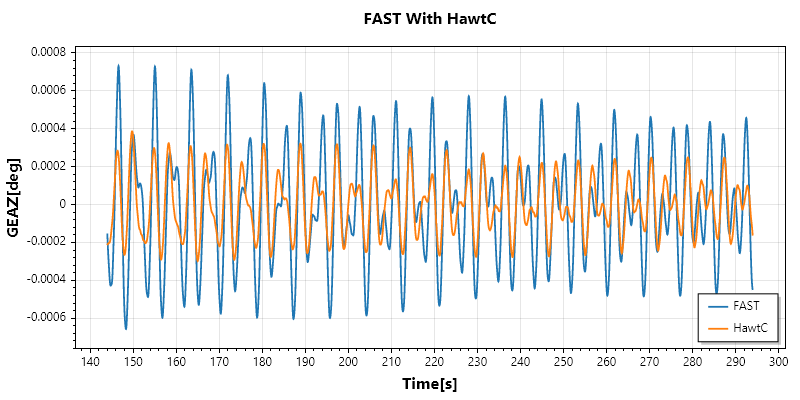

In [59]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][4800,9800].ToArray(), fastres["QD_TFA2"][4800,9800].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][4800,9800].ToArray(), hawcres8["QD_TFA2   "][4800,9800].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("GEAZ[deg]");
plt.Title("FAST With HawtC");
plt


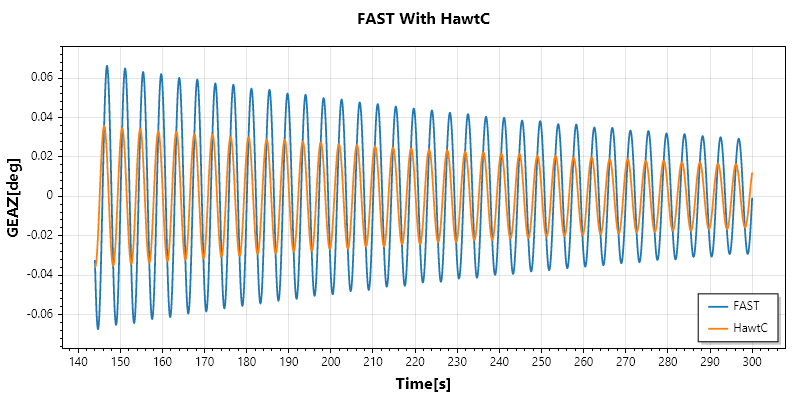

In [60]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), fastres["QD_TSS1"][4800,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), hawcres8["QD_TSS1   "][4800,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("GEAZ[deg]");
plt.Title("FAST With HawtC");
plt


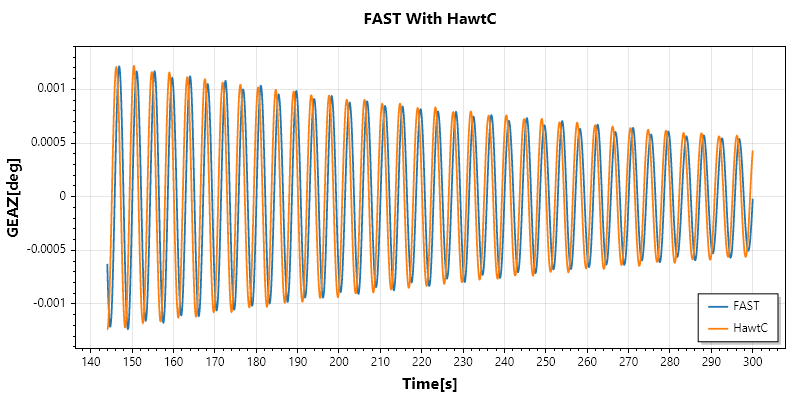

In [62]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), fastres["QD_TSS2"][4800,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"][4800,-1].ToArray(), hawcres8["QD_TSS2   "][4800,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("GEAZ[deg]");
plt.Title("FAST With HawtC");
plt

### 9 看看控制器的输出和气动扭矩

#### 9.1 读取数据

In [63]:
//#获取HawtC的输出
var hawcres8=OpenWECD.APIL.PostAPI.PstAPI.MBDApi_GetFileDATADirectory(@"G:\2026\OpenhastV7\demo\openhast_x64\IEA_15MW_onshore\TESTRES\Hast_Land_15MWBaseLine_PowerProduction\\CON_Pitch Control And Generator Control  Openhast 15MW_Land_BaseLine_LinearBlade_NTM11.0.CON.out");
Otherhelper.Tostring(hawcres8.Keys.ToArray<string>())

Time
BlPitchC  B_0
BlPitchC  B_2
GenTq     
GenPwr    



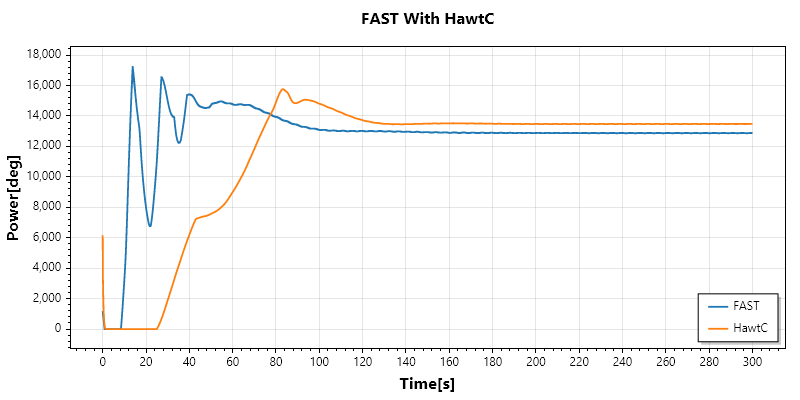

In [64]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["GenPwr"][0,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres8["GenPwr    "][0,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Power[deg]");
plt.Title("FAST With HawtC");
plt


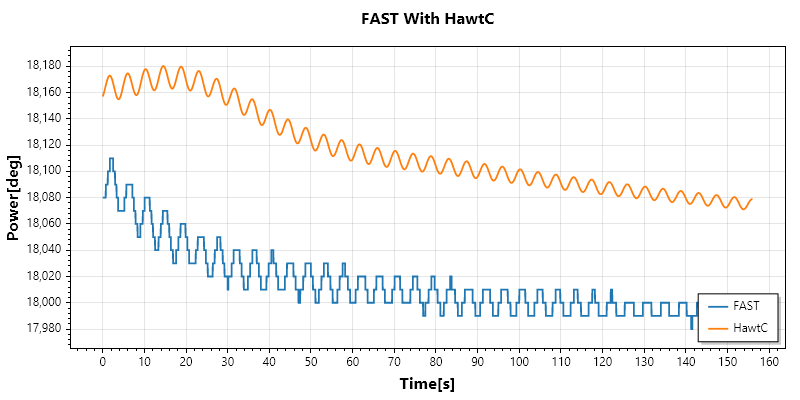

In [65]:
ScottPlot.Plot plt = new();
// plt.Add.Scatter(fastres["Time"].ToArray(), fastres["RootMx1"].ToArray());
// plt.Add.Scatter(fastres["Time"].ToArray(), hawcres4["RootMx1"].ToArray());
var sig1=plt.Add.Scatter(fastres["Time"].ToArray(), fastres["GenTq"][4800,-1].ToArray());
sig1.LegendText="FAST";
sig1.MarkerSize=0.0f;
sig1.LineWidth=1.8f;
var sig2=plt.Add.Scatter(fastres["Time"].ToArray(), hawcres8["GenTq     "][4800,-1].ToArray());//BAzimuth  B_0
sig2.LegendText="HawtC";
sig2.MarkerSize=0.0f;
sig2.LineWidth=1.8f;
plt.XLabel("Time[s]");
plt.YLabel("Power[deg]");
plt.Title("FAST With HawtC");
plt

In [1039]:
180.0/18000.0

0.01